In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_excel("https://github.com/nadiinchi/intro_sklearn/raw/master/scoring.xlsx")

In [3]:
data.head()

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,1311.0,2,2,1,4,34.0,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,1552.0,1,3,1,1,31.0,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,451.0,1,3,1,4,21.0,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,4036.0,0,1,1,3,25.0,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,909.5,1,2,1,4,37.0,1,...,1,1,1,0,0,0,0,1,education,0


In [6]:
X = data[data.columns[:-2]]
y = data["target"]
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [22]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
preds = model.predict_proba(X_te)[:, 1]

In [33]:
preds[:10]

array([0.49142652, 0.38330173, 0.38575297, 0.27279482, 0.54220024,
       0.48902035, 0.67760799, 0.90318717, 0.33445777, 0.52517839])

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [24]:
fpr, tpr, thresholds = roc_curve(y_te, preds, pos_label=1)

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0,0.5,'TPR')

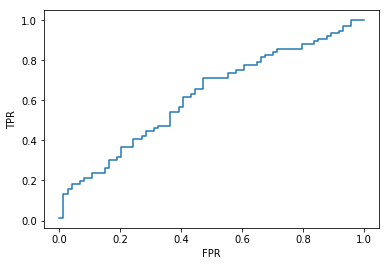

In [30]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [27]:
precision, recall, thresholds = precision_recall_curve(y_te, preds)

Text(0,0.5,'precision')

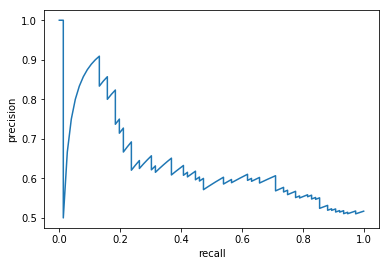

In [31]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")